# Predicting Individual's Salary

Using[US census data](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-data.tsv&sa=D&sntz=1&usg=AFQjCNGp2K-9_NTjdjqwi627u3kPcszXqw). The goal is to determine whether a person makes over $50K. The dataset was extracted from the 1994 US census data. You can find the details of the dataset [here](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-attributes.txt&sa=D&sntz=1&usg=AFQjCNEBbQwdw2e0dPqWhuQkomlP9hnDtw). The data is stored in a tab separated value file,  and each line represents a person.

In [1]:
print('Lida Karadimou  --  U30422531  --  ledakar@bu.edu')

Lida Karadimou  --  U30422531  --  ledakar@bu.edu


In [2]:
import pandas as pd
data = pd.read_csv('hw4-task1-data.tsv', sep='\t',skiprows = 8,names = ['age', 'workclass', 'fnlwgt','education', 'educationNum', 'maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','income'] ,  prefix = ['age', 'workclass', 'fnlwgt','education', 'educationNum', 'maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','income'] )
data = data[1:]


#data2 will be used to drop missing values and then determine mode for each column
data2 = data
data2 = data2[data2.age != '?']
data2 = data2[data2.workclass != '?']
data2 = data2[data2.education != '?']
data2 = data2[data2.relationship != '?']
data2 = data2[data2.maritalStatus != '?']
data2 = data2[data2.race != '?']
data2 = data2[data2.sex != '?']
data2 = data2[data2.occupation != '?']
data2 = data2[data2.nativeCountry != '?']
print(data2)

#printing the mode of every variable to replace the missing values with it
print('age',data2['age'].value_counts().idxmax())  #36
print('workclass',data2['workclass'].value_counts().idxmax())  #private
print('education',data2['education'].value_counts().idxmax())  #HS-grad
print('relationship',data2['relationship'].value_counts().idxmax()) #Husband
print('maritalStatus',data2['maritalStatus'].value_counts().idxmax()) #Married-civ-spouse
print('occupation',data2['occupation'].value_counts().idxmax()) #Craft-repair
print('nativeCountry',data2['nativeCountry'].value_counts().idxmax()) #United-States
print('sex',data2['sex'].value_counts().idxmax()) #Male
print('race',data2['race'].value_counts().idxmax()) #White

      age         workclass    fnlwgt     education  educationNum  \
1      39         State-gov   77516.0     Bachelors          13.0   
2      50  Self-emp-not-inc   83311.0     Bachelors          13.0   
3      38           Private  215646.0       HS-grad           9.0   
4      53           Private  234721.0          11th           7.0   
5      28           Private  338409.0     Bachelors          13.0   
6      37           Private  284582.0       Masters          14.0   
7      49           Private  160187.0           9th           5.0   
8      52  Self-emp-not-inc  209642.0       HS-grad           9.0   
9      31           Private   45781.0       Masters          14.0   
10     42           Private  159449.0     Bachelors          13.0   
11     37           Private  280464.0  Some-college          10.0   
12     30         State-gov  141297.0     Bachelors          13.0   
13     23           Private  122272.0     Bachelors          13.0   
14     32           Private  20501

In [3]:
#replacing with most common values: 
data[['age']]=data[['age']].replace([['?']],[['36']])
data[['workclass']]=data[['workclass']].replace([['?']],[['Private']])
data[['education']]=data[['education']].replace([['?']],[['HS-grad']])
data[['relationship']]=data[['relationship']].replace([['?']],[['Husband']])
data[['maritalStatus']]=data[['maritalStatus']].replace([['?']],[['Married-civ-spouse']])
data[['occupation']]=data[['occupation']].replace([['?']],[['Craft-repair']])
data[['nativeCountry']]=data[['nativeCountry']].replace([['?']],[['United-States']])
data[['sex']]=data[['sex']].replace([['?']],[['Male']])
data[['race']]=data[['race']].replace([['?']],[['White']])

In [4]:
data_workclass = pd.get_dummies(data['workclass'],prefix = 'work')
data_new_workclass = pd.concat([data, data_workclass], axis=1)

data_edu = pd.get_dummies(data['education'],prefix = 'edu')
data_new_edu = pd.concat([data_new_workclass, data_edu], axis=1)

data_marital = pd.get_dummies(data['maritalStatus'],prefix = 'marital')
data_new_marital = pd.concat([data_new_edu, data_marital], axis=1)

data_occupation = pd.get_dummies(data['occupation'],prefix = 'occ')
data_new_occupation = pd.concat([data_new_marital, data_occupation], axis=1)

data_relationship = pd.get_dummies(data['relationship'],prefix = 'rel')
data_new_relationship = pd.concat([data_new_occupation, data_relationship], axis=1)

data_race = pd.get_dummies(data['race'],prefix = 'race')
data_new_race = pd.concat([data_new_relationship, data_race], axis=1)

data_sex = pd.get_dummies(data['sex'],prefix = 'sex')
data_new_sex = pd.concat([data_new_race, data_sex], axis=1)

data_nationality = pd.get_dummies(data['nativeCountry'],prefix = 'nation')
data_new_nationality = pd.concat([data_new_sex, data_nationality], axis=1)

print(data_new_nationality)

      age         workclass    fnlwgt     education  educationNum  \
1      39         State-gov   77516.0     Bachelors          13.0   
2      50  Self-emp-not-inc   83311.0     Bachelors          13.0   
3      38           Private  215646.0       HS-grad           9.0   
4      53           Private  234721.0          11th           7.0   
5      28           Private  338409.0     Bachelors          13.0   
6      37           Private  284582.0       Masters          14.0   
7      49           Private  160187.0           9th           5.0   
8      52  Self-emp-not-inc  209642.0       HS-grad           9.0   
9      31           Private   45781.0       Masters          14.0   
10     42           Private  159449.0     Bachelors          13.0   
11     37           Private  280464.0  Some-college          10.0   
12     30         State-gov  141297.0     Bachelors          13.0   
13     23           Private  122272.0     Bachelors          13.0   
14     32           Private  20501

In [5]:
#DUMMY VARIABLE FOR INCOME:

data_incomeTemp = data[['income']]
data_income = pd.DataFrame([99],columns=['Income-higher']) 
#just placing 99 on the first row to create the dataframe (will then be removed)

for i in data_incomeTemp['income']:
    if (str(i)[0] == '>'):
        df = pd.DataFrame([1],columns=['Income-higher'])
        data_income = data_income.append(df, ignore_index=True)
    else:
        df = pd.DataFrame([0],columns=['Income-higher'])
        data_income = data_income.append(df, ignore_index=True)

data_income = data_income[1:] #removing the '99' value we had added at the beginning
#print(data_income)

data_dummies_final = pd.concat([data_new_nationality, data_income], axis=1)
data_dummies_final = data_dummies_final.drop( ['education','educationNum','workclass','maritalStatus','occupation','nativeCountry','relationship','race','sex','income'], axis = 1 )
print(data_dummies_final)

      age    fnlwgt  capitalGain  capitalLoss  hoursPerWeek  work_Federal-gov  \
1      39   77516.0       2174.0          0.0          40.0               0.0   
2      50   83311.0          0.0          0.0          13.0               0.0   
3      38  215646.0          0.0          0.0          40.0               0.0   
4      53  234721.0          0.0          0.0          40.0               0.0   
5      28  338409.0          0.0          0.0          40.0               0.0   
6      37  284582.0          0.0          0.0          40.0               0.0   
7      49  160187.0          0.0          0.0          16.0               0.0   
8      52  209642.0          0.0          0.0          45.0               0.0   
9      31   45781.0      14084.0          0.0          50.0               0.0   
10     42  159449.0       5178.0          0.0          40.0               0.0   
11     37  280464.0          0.0          0.0          80.0               0.0   
12     30  141297.0         

In [6]:
#converting to integers because age is a string and then for the rest there is no need to keep a float
dataframe = data_dummies_final.astype(int)
print(dataframe)

       age  fnlwgt  capitalGain  capitalLoss  hoursPerWeek  work_Federal-gov  \
1       39   77516         2174            0            40                 0   
2       50   83311            0            0            13                 0   
3       38  215646            0            0            40                 0   
4       53  234721            0            0            40                 0   
5       28  338409            0            0            40                 0   
6       37  284582            0            0            40                 0   
7       49  160187            0            0            16                 0   
8       52  209642            0            0            45                 0   
9       31   45781        14084            0            50                 0   
10      42  159449         5178            0            40                 0   
11      37  280464            0            0            80                 0   
12      30  141297            0         

Now that we know how to convert categorical variables to numerical dummy variables, we can use the algorithms we learned in the class. We will use KNeighborsClassifier.

KNeighborsClassifier is an instant-based classification which simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point.

Reporting the accuracy the prediction.


In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
from sklearn.neighbors import KNeighborsClassifier

x_train = dataframe[:32557].as_matrix() #first 70% of values used as train   (32,557)
y_train = dataframe[:32557]['Income-higher'].as_matrix()    #sal             
x_test =  dataframe[32557:].as_matrix() #13,953 -- the other 30%
y_test = dataframe[32557:]['Income-higher'].as_matrix()
labels = (dataframe.columns.values)

print('Unique labels: {}'.format(np.unique(y_train)))



Unique labels: [0 1]


In [7]:
#running k means on k =5 and using 70% of our sample as training and 30% as testing 
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 5: {}'.format(knn.score(x_test, y_test)))

Accuracy on test data for k = 5: 0.7773238730022217


In [8]:
#on the training data
y_pred_train = knn.predict(x_train)
print('Accuracy on training data: {}'.format(knn.score(x_train, y_train)))
#we expect a higher accuracy when we test data on the same values that we used to train, but still it should not be 100%

Accuracy on training data: 0.8361642657493012


In [9]:
#k = 5 was chosen as a starting point earlier, 
#now experimenting with more k values 
k = 3
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 3: {}'.format(knn.score(x_test, y_test)))

k = 2
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 2: {}'.format(knn.score(x_test, y_test)))

k = 6
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 6: {}'.format(knn.score(x_test, y_test)))

#kmeans for entire dataframe
x= dataframe[:].as_matrix() #first 70% of values used as train   (32,557)
y = dataframe[:]['Income-higher'].as_matrix()
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)
y_pred_test = knn.predict(x)
print('Accuracy on test data for k = 5 and using our entire sample data to train and testing on our previous test set: {}'.format(knn.score(x_test, y_test)))
print('training with our entire data gives more accuracy than just using the 70% which gave 0.7857091664874938 (still testing on only our 30%') 

Accuracy on test data for k = 3: 0.7607682935569412
Accuracy on test data for k = 2: 0.7857091664874938
Accuracy on test data for k = 6: 0.7925177381208343
Accuracy on test data for k = 5 and using our entire sample data to train and testing on our previous test set: 0.8379559951264961
training with our entire data gives more accuracy than just using the 70% which gave 0.7857091664874938 (still testing on only our 30%


In [10]:
#We can see from above that our accuracy on the test data increases as we increase k, so in order to choose 
#what value of k we should really be using for knn we can plot a graph with accuracy on the y-axis and 
#different values of k on the x axis and see where it starts becoming more stable -- (using the 70% to train and 30%
#to test) 

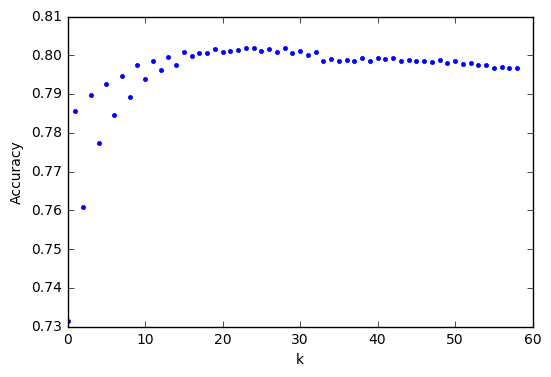

In [8]:
import matplotlib.pyplot as plt
acc = []
for k in range(1,60):
    knn_digits = KNeighborsClassifier(n_neighbors=k)
    knn_digits.fit(x_train, y_train)
    y_digits_test_pred = knn_digits.predict(x_test)
    # print("KNN test accuracy on MNIST digits, k = {}, acc = {}: ".format(
            #k,knn_digits.score(X_digits_test, y_digits_test)))
    acc.append(knn_digits.score(x_test, y_test))

plt.plot(acc,'.')
plt.xlabel('k')
_=plt.ylabel('Accuracy')

In [12]:
#it looks like we should be trying out k with values close to 20

In [13]:
k = 18
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 18: {}'.format(knn.score(x_test, y_test)))

Accuracy on test data for k = 18: 0.8004730165555795


In [14]:
k = 19
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 19: {}'.format(knn.score(x_test, y_test)))

k = 20
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
print('Accuracy on test data for k = 20: {}'.format(knn.score(x_test, y_test)))


Accuracy on test data for k = 19: 0.800616354905755
Accuracy on test data for k = 20: 0.8015480541818963


In [15]:
#We can see that for k= 20 we get a quite good accuracy of about 80% on our test data